Pipeline to Get 1D Spectra from Raw Data (IRD Stream)
=====================================================

This tutorial demonstrates how to reduce raw data to wavelength-calibrated 1D spectra. 
By using the `Stream2D` framework, you can apply functions to multiple FITS files efficiently.

:ref:`step1`

## Step 0: Settings
### Directory Structure

First, create a `datadir` for the raw data and `anadir` for storing the output.

This tutorial assumes the following directory structure:
```
.
└── pyird/
    └── data/
        └── 20210317/
            ├── flat
            ├── thar
            ├── target
            ├── dark
            └── reduc
```
In this structure, the flat, thar, target, and dark directories are part of the `datadir`, each containing raw data for 'Flat', 'ThAr', 'Target', and optionally 'Dark' frames. 
The reduc directory is used as `anadir` for storing processed data.

In [1]:
import pathlib
basedir = pathlib.Path('~/pyird/data/20210317/').expanduser()

### Specify the Data to be Analyzed

Please change the following variables based on the data you want to analyze.

In [2]:
band = 'h' #'h' or 'y'
mmf = 'mmf2' #'mmf1' (comb fiber) or 'mmf2' (star fiber)
readout_noise_mode = 'default'

**Note**:

Ensure that the `readout_noise_mode` is set to either 'real' or 'default'.

- `readout_noise_mode = 'real'`: Need to reduce the dataset with `band = 'y'` and `mmf = 'mmf1'` at first.
    - With this setting, uncertainties and signal-to-noise ratio at each wavelength will be included in the output files (**nw..._m?.dat** and **ncw..._m?.dat**).
    - Those values are based on the readout noise (RN) calculated using the comb spectrum (in mmf1) of the Y/J band.

- `readout_noise_mode = 'real'`: Uses a default readout noise (RN) value (RN=12 $e^{-}$).

.. _step1:
## Step 1: Preprocessing the Calibration Dataset

<img src="../figures/reduc_flowchart_calib.png" width=80%>

### Step 1-1: Identifying Apertures

- The `aptrace` function is used to identify apertures.
- Number of apertures (`nap`): 42 for H band, 102 for Y/J band.
- These apertures are identified in the FLAT_COMB data.
- If your observation was performed with a single fiber, set `nap` to half the default value.

No fitsid yet.
median combine:  



  0%|                                                                                                                          | 0/50 [00:00<?, ?it/s]


 74%|██████████████████████████████████████████████████████████████████████████████████▉                             | 37/50 [00:00<00:00, 367.44it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 420.69it/s]

default nap value
cross-section: row  1201


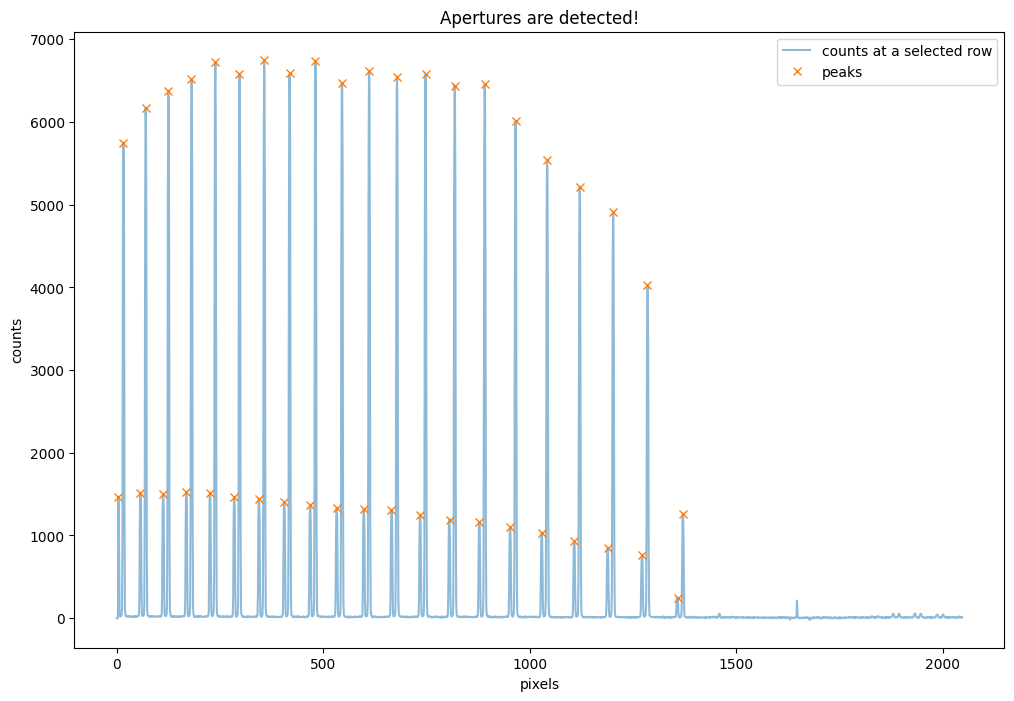


  0%|                                                                                                                          | 0/42 [00:00<?, ?it/s]


  2%|██▋                                                                                                               | 1/42 [00:00<00:08,  4.90it/s]


  5%|█████▍                                                                                                            | 2/42 [00:00<00:08,  4.64it/s]


  7%|████████▏                                                                                                         | 3/42 [00:00<00:08,  4.47it/s]


 10%|██████████▊                                                                                                       | 4/42 [00:00<00:08,  4.69it/s]


 12%|█████████████▌                                                                                                    | 5/42 [00:01<00:10,  3.64it/s]


 14%|████████████████▎                                                                                                 | 6/42 [00:01<00:10,  3.48it/s]


 17%|███████████████████                                                                                               | 7/42 [00:01<00:10,  3.35it/s]


 19%|█████████████████████▋                                                                                            | 8/42 [00:02<00:09,  3.60it/s]


 21%|████████████████████████▍                                                                                         | 9/42 [00:02<00:08,  3.93it/s]


 24%|██████████████████████████▉                                                                                      | 10/42 [00:02<00:07,  4.06it/s]


 26%|█████████████████████████████▌                                                                                   | 11/42 [00:02<00:07,  4.19it/s]


 29%|████████████████████████████████▎                                                                                | 12/42 [00:02<00:06,  4.29it/s]


 31%|██████████████████████████████████▉                                                                              | 13/42 [00:03<00:06,  4.57it/s]


 33%|█████████████████████████████████████▋                                                                           | 14/42 [00:03<00:06,  4.65it/s]


 36%|████████████████████████████████████████▎                                                                        | 15/42 [00:03<00:05,  4.73it/s]


 38%|███████████████████████████████████████████                                                                      | 16/42 [00:03<00:05,  4.83it/s]


 40%|█████████████████████████████████████████████▋                                                                   | 17/42 [00:03<00:05,  4.95it/s]


 43%|████████████████████████████████████████████████▍                                                                | 18/42 [00:04<00:04,  5.04it/s]


 45%|███████████████████████████████████████████████████                                                              | 19/42 [00:04<00:04,  5.10it/s]


 48%|█████████████████████████████████████████████████████▊                                                           | 20/42 [00:04<00:04,  5.14it/s]


 50%|████████████████████████████████████████████████████████▌                                                        | 21/42 [00:04<00:04,  5.18it/s]


 52%|███████████████████████████████████████████████████████████▏                                                     | 22/42 [00:04<00:03,  5.21it/s]


 55%|█████████████████████████████████████████████████████████████▉                                                   | 23/42 [00:05<00:03,  5.21it/s]


 57%|████████████████████████████████████████████████████████████████▌                                                | 24/42 [00:05<00:03,  5.20it/s]


 60%|███████████████████████████████████████████████████████████████████▎                                             | 25/42 [00:05<00:03,  5.25it/s]


 62%|█████████████████████████████████████████████████████████████████████▉                                           | 26/42 [00:05<00:03,  5.27it/s]


 64%|████████████████████████████████████████████████████████████████████████▋                                        | 27/42 [00:05<00:02,  5.32it/s]


 67%|███████████████████████████████████████████████████████████████████████████▎                                     | 28/42 [00:06<00:02,  5.27it/s]


 69%|██████████████████████████████████████████████████████████████████████████████                                   | 29/42 [00:06<00:02,  5.25it/s]


 71%|████████████████████████████████████████████████████████████████████████████████▋                                | 30/42 [00:06<00:02,  5.23it/s]


 74%|███████████████████████████████████████████████████████████████████████████████████▍                             | 31/42 [00:06<00:02,  5.23it/s]


 76%|██████████████████████████████████████████████████████████████████████████████████████                           | 32/42 [00:06<00:01,  5.25it/s]


 79%|████████████████████████████████████████████████████████████████████████████████████████▊                        | 33/42 [00:07<00:01,  5.26it/s]


 81%|███████████████████████████████████████████████████████████████████████████████████████████▍                     | 34/42 [00:07<00:01,  5.26it/s]


 83%|██████████████████████████████████████████████████████████████████████████████████████████████▏                  | 35/42 [00:07<00:01,  5.26it/s]


 86%|████████████████████████████████████████████████████████████████████████████████████████████████▊                | 36/42 [00:07<00:01,  5.31it/s]


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████▌             | 37/42 [00:07<00:00,  5.23it/s]


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 38/42 [00:07<00:00,  4.97it/s]


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 39/42 [00:08<00:00,  5.02it/s]


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 40/42 [00:08<00:00,  5.10it/s]


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 41/42 [00:08<00:00,  5.16it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 42/42 [00:08<00:00,  5.22it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 42/42 [00:08<00:00,  4.80it/s]

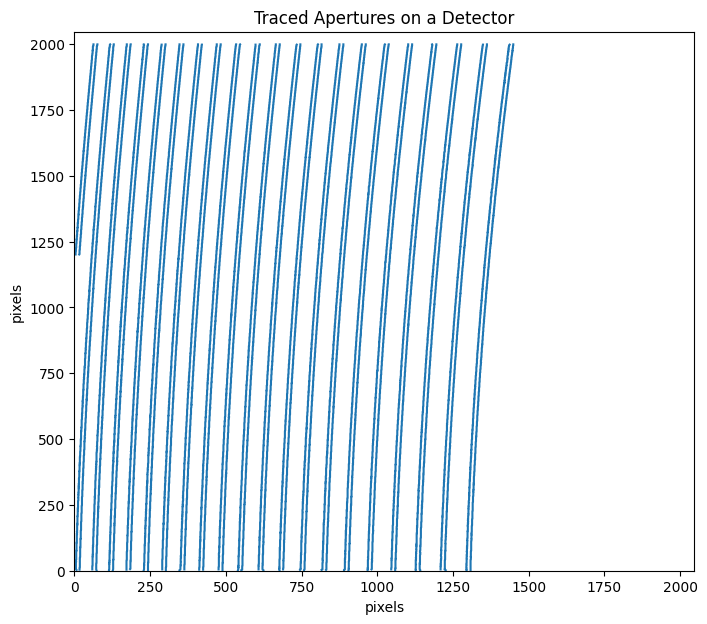

In [3]:
from pyird.utils import irdstream

## FLAT_COMB
# settings
datadir = basedir/'flat/'
anadir = basedir/'reduc/'
flat_comb = irdstream.Stream2D("flat_comb",datadir,anadir)
flat_comb.fitsid = list(range(41704,41804,2)) 

flat_comb.band = band

# aperture extraction
if band=='h' and flat_comb.fitsid[0]%2==0:
    flat_comb.fitsid_increment() 
    trace_mmf=flat_comb.aptrace(cutrow = 1200,nap=42) 
elif band=='y':
    trace_mmf=flat_comb.aptrace(cutrow = 1000,nap=102) 

- Define 'trace_mask' to mask light from both fibers.
- Aperture width is 6 pixels (from -2 to +4) for IRD data and 5 pixels (from -2 to 3) for REACH data by default. You can change it `.width` instance of trace_mmf.


  0%|                                                                                                                          | 0/42 [00:00<?, ?it/s]


 29%|████████████████████████████████                                                                                | 12/42 [00:00<00:00, 113.28it/s]


 57%|████████████████████████████████████████████████████████████████                                                | 24/42 [00:00<00:00, 106.02it/s]


 83%|█████████████████████████████████████████████████████████████████████████████████████████████▎                  | 35/42 [00:00<00:00, 103.98it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 42/42 [00:00<00:00, 104.48it/s]


  0%|                                                                                                                          | 0/42 [00:00<?, ?it/s]


 29%|████████████████████████████████                                                                                | 12/42 [00:00<00:00, 113.01it/s]


 57%|████████████████████████████████████████████████████████████████                                                | 24/42 [00:00<00:00, 103.82it/s]


 83%|█████████████████████████████████████████████████████████████████████████████████████████████▎                  | 35/42 [00:00<00:00, 100.83it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 42/42 [00:00<00:00, 102.21it/s]

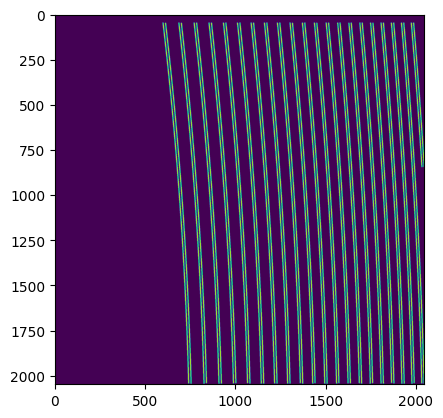

In [4]:
trace_mask = trace_mmf.mask()

import matplotlib.pyplot as plt
# apeture mask plot
plt.imshow(trace_mmf.mask()) 
plt.show()

- Reduce apertures in the mask to extract the spectrum from the desired fiber

In [5]:
if mmf=='mmf2':
    trace_mmf.choose_mmf2_aperture() #mmf2 (star fiber)
elif mmf=='mmf1':
    trace_mmf.choose_mmf1_aperture() #mmf1 (comb fiber)

### Step 1-2: Removing hotpixels

- There are two options for creating the hotpixel mask.
- This tutorial introduces one method using dark data.
- Refer to `pyird.io.read_hotpix <https://secondearths.sakura.ne.jp/pyird/pyird/pyird.io.html#module-pyird.io.read_hotpix>`_ module for an alternative approach without dark data.

In [6]:
from pyird.image.bias import bias_subtract_image
from pyird.image.hotpix import identify_hotpix_sigclip

## HOTPIXEL MASK: 
## DARK
datadir = basedir/'dark/'
anadir = basedir/'reduc/'
dark = irdstream.Stream2D('dark', datadir, anadir,fitsid=[43814]) # Multiple file is ok
if band=='h' and dark.fitsid[0]%2==0:
    dark.fitsid_increment() 
median_image = dark.immedian()
im_subbias = bias_subtract_image(median_image)
hotpix_mask = identify_hotpix_sigclip(im_subbias)

fitsid: [43814]
median combine:  



  0%|                                                                                                                           | 0/1 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 121.30it/s]

hotpix mask = 0.45 percent


### Step 1-3: Wavelength Calibration


- Wavelength calibration is performed by using reference frames (Thrium-Argon).
- You do not need to manually identify emission lines; ``calibrate_wavelength`` automatically references the line list!

In [7]:
## THAR (ThAr-ThAr)
# Settings
datadir = basedir/'thar'
anadir = basedir/'reduc'
if band=='h':
    rawtag='IRDAD000'
elif band=='y':
    rawtag='IRDBD000'
thar=irdstream.Stream2D("thar",datadir,anadir,rawtag=rawtag,fitsid=list(range(14632,14732)))
thar.trace = trace_mmf

# removing noise pattern
thar.clean_pattern(trace_mask=trace_mask,extin='', extout='_cp', hotpix_mask=hotpix_mask)

# wavelength calibration
thar.calibrate_wavelength()

fitsid: [14632, 14633, 14634, 14635, 14636, 14637, 14638, 14639, 14640, 14641, 14642, 14643, 14644, 14645, 14646, 14647, 14648, 14649, 14650, 14651, 14652, 14653, 14654, 14655, 14656, 14657, 14658, 14659, 14660, 14661, 14662, 14663, 14664, 14665, 14666, 14667, 14668, 14669, 14670, 14671, 14672, 14673, 14674, 14675, 14676, 14677, 14678, 14679, 14680, 14681, 14682, 14683, 14684, 14685, 14686, 14687, 14688, 14689, 14690, 14691, 14692, 14693, 14694, 14695, 14696, 14697, 14698, 14699, 14700, 14701, 14702, 14703, 14704, 14705, 14706, 14707, 14708, 14709, 14710, 14711, 14712, 14713, 14714, 14715, 14716, 14717, 14718, 14719, 14720, 14721, 14722, 14723, 14724, 14725, 14726, 14727, 14728, 14729, 14730, 14731]
Skipped 100 files because they already exists.



0it [00:00, ?it/s]


0it [00:00, ?it/s]

median combine:  _cp



  0%|                                                                                                                         | 0/100 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1139.24it/s]

/Users/yuikasagi/git/pyird/src/pyird/utils/irdstream.py:514: RuntimeWarning: All-NaN slice encountered
  median_image = np.nanmedian(imall, axis=0)


### Step 1-4: Creating a Normalized Flat

- This process similar to `hdsis_ecf <https://github.com/chimari/hds_iraf>`_ for HDS/Subaru data to reduce the fringe appearing in a spectrum.
- In the preparation of this process, we create the normalized flat by using `apnormalize`.
- After applying `flatten`, **'{stream_id}\_{band}\_{mmf}.fits'** (e.g., flat_star_h_m2.fits) is created in anadir, containing the extracted spectrum of flat data.

In [8]:
## FLAT
if mmf=='mmf2': # Star fiber -> FLAT_STAR
    # Settings
    datadir = basedir/'flat/'
    anadir = basedir/'reduc/'
    flat_star=irdstream.Stream2D("flat_star",datadir,anadir)
    flat_star.fitsid=list(range(41804,41904,2)) 
    flat_star.trace = trace_mmf
    flat_star.band=band 
    if band == 'h' and flat_star.fitsid[0]%2==0:
        flat_star.fitsid_increment() 

    # Removing noise pattern
    flat_star.clean_pattern(trace_mask=trace_mask,extin='', extout='_cp', hotpix_mask=hotpix_mask)
    flat_star.imcomb = True # median combine

    # Extract 1D spectrum
    flat_star.flatten(hotpix_mask=hotpix_mask)

    # Flat spectrum normalized in each pixel within an aperture
    df_flatn = flat_star.apnormalize()

elif mmf=='mmf1': # Comb fiber -> FLAT_COMB
    flat_comb.trace = trace_mmf

    # Removing noise pattern
    flat_comb.clean_pattern(trace_mask=trace_mask,extin='', extout='_cp', hotpix_mask=hotpix_mask)
    flat_comb.imcomb = True # median combine

    # Extract 1D spectrum
    flat_comb.flatten(hotpix_mask=hotpix_mask)

    # Flat spectrum normalized in each pixel within an aperture
    df_flatn = flat_comb.apnormalize()

No fitsid yet.
Skipped 50 files because they already exists.



0it [00:00, ?it/s]


0it [00:00, ?it/s]


0it [00:00, ?it/s]


0it [00:00, ?it/s]

continuum is fitted with order_fit = 23.
median combine:  _cp



  0%|                                                                                                                          | 0/50 [00:00<?, ?it/s]


 78%|███████████████████████████████████████████████████████████████████████████████████████▎                        | 39/50 [00:00<00:00, 369.11it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 403.72it/s]

/Users/yuikasagi/git/pyird/src/pyird/utils/irdstream.py:514: RuntimeWarning: All-NaN slice encountered
  median_image = np.nanmedian(imall, axis=0)



  0%|                                                                                                                          | 0/21 [00:00<?, ?it/s]


 10%|██████████▊                                                                                                       | 2/21 [00:00<00:03,  6.03it/s]


 14%|████████████████▎                                                                                                 | 3/21 [00:00<00:03,  5.05it/s]


 19%|█████████████████████▋                                                                                            | 4/21 [00:00<00:03,  4.66it/s]


 24%|███████████████████████████▏                                                                                      | 5/21 [00:01<00:03,  4.46it/s]


 29%|████████████████████████████████▌                                                                                 | 6/21 [00:01<00:03,  4.32it/s]


 33%|██████████████████████████████████████                                                                            | 7/21 [00:01<00:03,  4.24it/s]


 38%|███████████████████████████████████████████▍                                                                      | 8/21 [00:01<00:03,  4.07it/s]


 43%|████████████████████████████████████████████████▊                                                                 | 9/21 [00:02<00:02,  4.11it/s]


 48%|█████████████████████████████████████████████████████▊                                                           | 10/21 [00:02<00:02,  4.07it/s]


 52%|███████████████████████████████████████████████████████████▏                                                     | 11/21 [00:02<00:02,  4.09it/s]


 57%|████████████████████████████████████████████████████████████████▌                                                | 12/21 [00:02<00:02,  4.12it/s]


 62%|█████████████████████████████████████████████████████████████████████▉                                           | 13/21 [00:03<00:01,  4.11it/s]


 67%|███████████████████████████████████████████████████████████████████████████▎                                     | 14/21 [00:03<00:01,  4.13it/s]


 71%|████████████████████████████████████████████████████████████████████████████████▋                                | 15/21 [00:03<00:01,  4.15it/s]


 76%|██████████████████████████████████████████████████████████████████████████████████████                           | 16/21 [00:03<00:01,  4.17it/s]


 81%|███████████████████████████████████████████████████████████████████████████████████████████▍                     | 17/21 [00:03<00:00,  4.18it/s]


 86%|████████████████████████████████████████████████████████████████████████████████████████████████▊                | 18/21 [00:04<00:00,  4.15it/s]


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 19/21 [00:04<00:00,  4.11it/s]


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 20/21 [00:04<00:00,  4.07it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:04<00:00,  4.03it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:04<00:00,  4.21it/s]

## Step 2: Extracting the Target 1D Spectrum

From here, we will extract target spectrum.

<img src="../figures/reduc_flowchart_target.png" width=80%>

In [9]:
#--------FOR TARGET--------#
# Settings
datadir = basedir/'target/'
anadir = basedir/'reduc/'
target = irdstream.Stream2D(
    'targets', datadir, anadir, fitsid=[41510])
if band=='h' and target.fitsid[0]%2==0:
    target.fitsid_increment() # when you use H-band
target.info = True  # show detailed info
target.trace = trace_mmf

fitsid: [41510]


### Step 2-1: Removing Noise Pattern on the Detector

In [10]:
target.clean_pattern(trace_mask=trace_mask, extin='', extout='_cp', hotpix_mask=hotpix_mask)

clean_pattern: output extension=_cp
Ignore IRDA00041511.fits -> IRDA00041511_cp.fits



0it [00:00, ?it/s]


0it [00:00, ?it/s]

### Step 2-2: Aperture Extraction & Flat Fielding

- The ``apext_flatfield`` function extracts each order while applying flat fielding.
- This process requires the flat spectrum normalized in each pixel within an aperture (i.e., df_flatn).
- After this process, **'IRDA000..._flnhp.fits'** (when `hotpix_mask` is set) or **'IRDA000..._fln.fits'** (when `hotpix_mask = None`) is created.

In [11]:
target.apext_flatfield(df_flatn, hotpix_mask=hotpix_mask)

Ignore IRDA00041511_cp.fits -> IRDA00041511_flnhp_m2.fits



0it [00:00, ?it/s]


0it [00:00, ?it/s]

### Step 2-3: Assigning Wavelength to the Extracted Spectrum

- The `dispcor` function assigns wavelength solution to the extracted spectrum.
- Please change the ``extin`` option to ``extin='_flnhp'`` or ``extin='_fln'`` depending on the previous process.
- After this process, **'w..._m?.dat'** is created, with data format: `$1: Wavelength [nm]`, `$2: Order`, `$3: Counts`.

/Users/yuikasagi/git/pyird/src/pyird/utils/irdstream.py:661: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  wspec = pd.concat([wspec, df_order])


dispcor: output spectrum= w41511_m2.dat


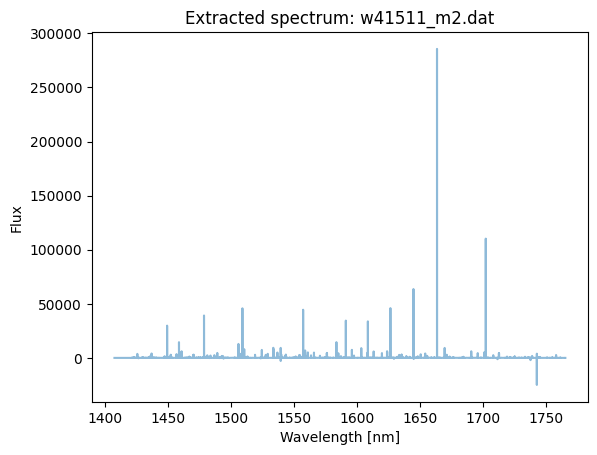

In [12]:
target.dispcor(master_path=thar.anadir,extin='_flnhp')

### Step 2-4: Creating the Blaze Function

- The blaze function is created from FLAT spectrum to ''normalize'' the spectra.
- After this process, **'wblaze_{band}_{mmf}.dat'** is created.


0it [00:00, ?it/s]


0it [00:00, ?it/s]


/Users/yuikasagi/git/pyird/src/pyird/utils/irdstream.py:661: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  wspec = pd.concat([wspec, df_order])


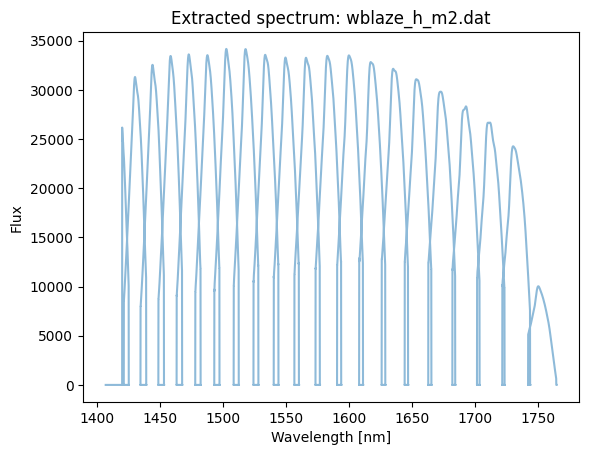

In [13]:
# blaze function
if mmf=='mmf2':
    flat_star.apext_flatfield(df_flatn,hotpix_mask=hotpix_mask)
    flat_star.dispcor(master_path=thar.anadir)
elif mmf=='mmf1':
    flat_comb.apext_flatfield(df_flatn,hotpix_mask=hotpix_mask)
    flat_comb.dispcor(master_path=thar.anadir)

### Step 2-5: Normalizing the Spectra

- Normalize the target spectrum by dividing it by the blaze function.
- After `normalize1D`, the normalized spectrum (**nw..._m?.dat**) and the order-combined spectrum (**ncw..._m?.dat**) are created.
    - Data formats are: 
        - Normalized (**nw**): `$1: Wavelength [nm]`, `$2: Order`, `$3: Counts`, `$4: S/N`, `$5: Uncertainties`
        - Order-combined (**ncw**): `$1: Wavelength [nm]`, `$2: Counts`, `$3: S/N`, `$4: Uncertainties`
- For the order-combined spectra: There are overlapping wavelengths at the edges of orders, so we "normalize" by summing up the flux in these regions to improve the signal-to-noise ratio.

Using default readout Noise : 12
readout noise of IRD detectors: ~12e- (10min exposure)


/Users/yuikasagi/miniforge3/envs/py312_pip/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/yuikasagi/miniforge3/envs/py312_pip/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/yuikasagi/git/pyird/src/pyird/spec/normalize.py:246: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_interp = pd.concat([df_interp, df_former[add_ind][df_interp.columns]])


normalize1D: output normalized 1D spectrum= nw41511_m2.dat


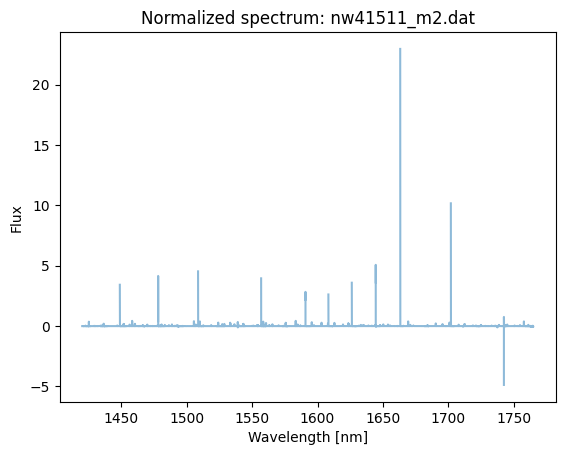

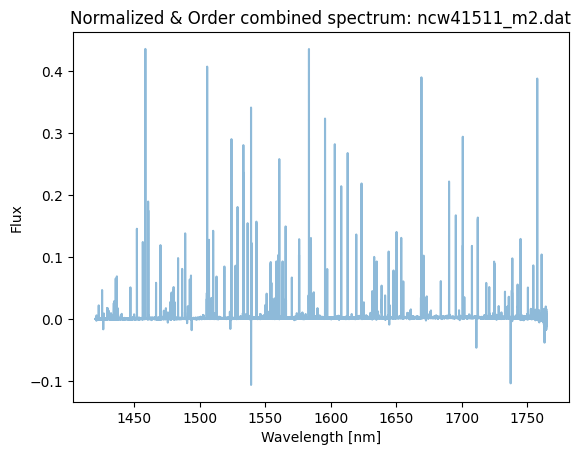

In [14]:
# combine & normalize
if mmf=='mmf2':
    target.normalize1D(master_path=flat_star.anadir,readout_noise_mode=readout_noise_mode)
elif mmf=='mmf1':
    target.normalize1D(master_path=flat_comb.anadir,readout_noise_mode=readout_noise_mode)

This concludes the data reduction process!